In [1]:
"""Example of finding the pareto front of a set,
and finding target values to fill gaps in the front"""

# Copyright (C) 2024 National Renewable Energy Laboratory

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.3.2"
__deprecated__ = False

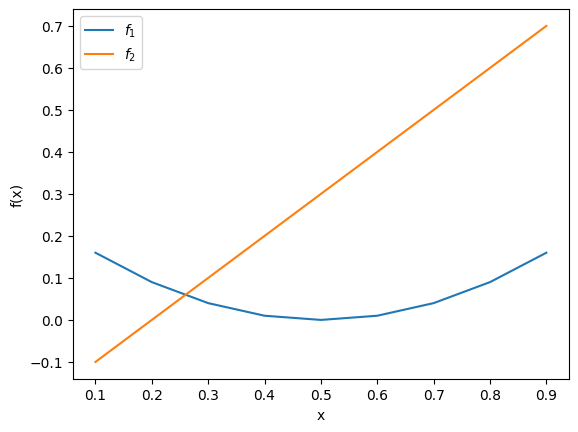

In [2]:
from blackboxopt.optimize import find_pareto_front
from blackboxopt.acquisition import ParetoFront
import numpy as np
import matplotlib.pyplot as plt

dim = 1
objdim = 2
def f(x):
    return [[(.5-_x)**2, _x-.2] for _x in x]

samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fsamples = np.array(f(samples))
plt.plot(samples, fsamples[:,0], label=r"$f_1$")
plt.plot(samples, fsamples[:,1], label=r"$f_2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

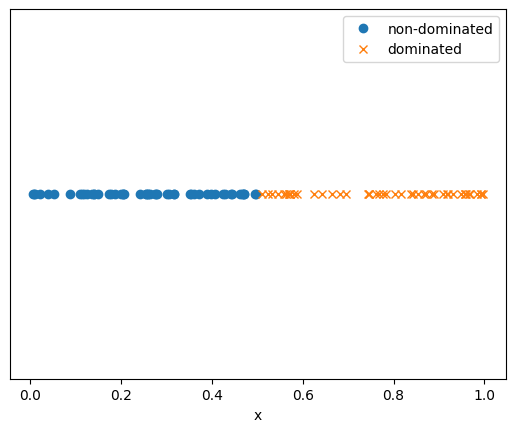

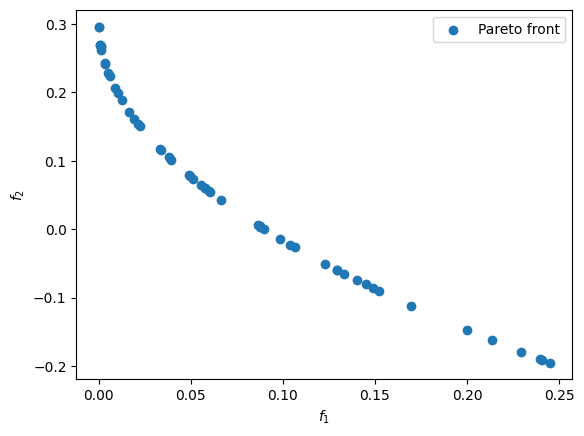

In [3]:
samples = np.random.rand(100)
fsamples = np.asarray(f(samples))
pareto_idx = find_pareto_front(samples, fsamples)
non_pareto_idx = np.setdiff1d(np.arange(len(samples)), pareto_idx)

plt.plot(samples[pareto_idx], np.ones_like(samples[pareto_idx]), 'o', label="non-dominated")
# plt.plot(samples[pareto_idx], fsamples[pareto_idx,1], 'o', label="non-dominated")
plt.plot(samples[non_pareto_idx], np.ones_like(samples[non_pareto_idx]), 'x', label="dominated")
# plt.plot(samples[non_pareto_idx], fsamples[non_pareto_idx,1], 'x', label="dominated")
plt.xlabel("x")
plt.yticks([], [])
plt.legend()
plt.show()

plt.scatter(fsamples[pareto_idx,0], fsamples[pareto_idx,1], label="Pareto front")
plt.xlabel(r"$f_1$")
plt.ylabel(r"$f_2$")
plt.legend()
plt.show()


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



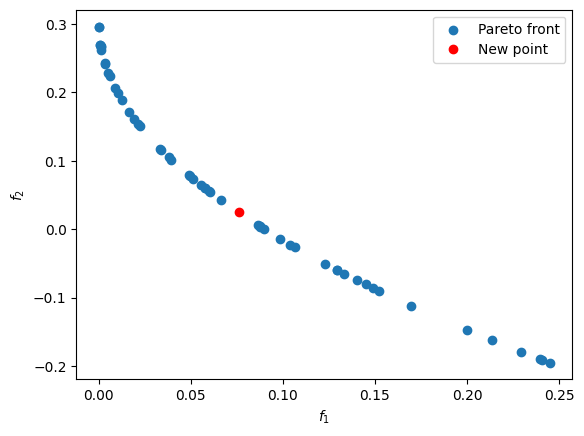

In [4]:
paretoFront = fsamples[pareto_idx,:]
tau = ParetoFront().pareto_front_target(paretoFront)

# Plot the Pareto front and the new point tau
plt.scatter(paretoFront[:, 0], paretoFront[:, 1], label="Pareto front")
plt.plot([tau[0]], [tau[1]], 'ro', label="New point")
plt.xlabel(r"$f_1$")
plt.ylabel(r"$f_2$")
plt.legend()
plt.show()